## US Visa Prediction Project

##### Life cycle of Machine Learning project

   * Understanding the problem statement
   * Data Collection
   * Exploratory Data Analysis
   * Data cleaning and data pre-processing
   * Feature Engineering and selection
   * Model Training
   * Model Evaluation
   * Choose the best model
   * Model deployment
   * Model Monitoring and re-training(if required)

## About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either temporary or permanent basis.The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workplace shortages.The immigration programs are administered by the Office of Foreign Labour Certification(OFLC)

## 1) Problem Statement

  * OLFC gives job certification applications for employers seeking to bring foreign workers into the United States and grant certification
  
  * As in last year the count of employees were huge so OFLC needs Machine Learning models to shortlist visa applicants based on their previous data

**In this project we are going to use the data given to build a Classification model**
  * This model is to check if visa will get approved or not based on the given dataset
  * This can be used to recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision



## 2) Data Collection

* This Dataset is part of Office of Foreign Labour Certification(OFLC)
* The data consists of 25480 rows and 12 columns

https://www.kaggle.com/datasets/moro23/easyvisa-dataset

### 2.1 Import Data and Required Packages

**Importing Pandas,Numpy,Seaborn,Matplotlib and Warnings library.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Importing the csv data as pandas dataframe.**

In [8]:
df = pd.read_csv(r"Visadataset.csv")

**Show Top 5 records.**

In [9]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


**Shape of the dataset.**

In [10]:
df.shape

(25480, 12)

**Summary of the dataset.**

In [11]:
# Describe the summary statistics of the dataset
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


**Check data types in the dataset**

In [12]:
#To check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## 3. Exploring Data

In [13]:
# separate numerical and categorical column names
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [14]:
#propotion of count on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Insights**

- `case_id` doesn't add any value in the dataset,also it won't contribute in predicting the target values,so it can be dropped from the dataset
-  `continent` : People from Asian continent have mostly applied for US Visa.Either we can combine remaining continents to form as 'single category' like Other, or we can keep them for further analysis
- `education_of_employee` : People apply for master's and bachelor's degree and only few people applies for high school(which makes sense and they have applied becuase of some reasons like relocation etc..). Doctorate class is less becuase very few people apply to doctore degree to US directly,others do their master's/bachelors and do doctor's degree.
- `has_job_experience` : Applicants with job experience have high propotion for visa application(mostly it is from master's applicants).
                        No job experience applicants can be from high school and bachelor's.
                        
- `requires_job_training` : Can be interpreted as people apply for work with similar skillset on what they learn during their course/ in previous experience(mostly relevancy is maintained,so requires job training is less)

- `region_of_employment` : applicants apply to all regions,with NE,South,West having almost similar propotion.Midwest region have less applicants than remaining 3 regions

- `unit_of_wage` : Most of them are yearly contracts

- `full-time-position` : Most applicants have applied for full time position


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix "uni" means "one".The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other types of Analysis are:
* **Bivariate Analysis** : Analysis of two variables
* **Multivariate Analysis** : Analysis of two or more variables

### Numerical Features

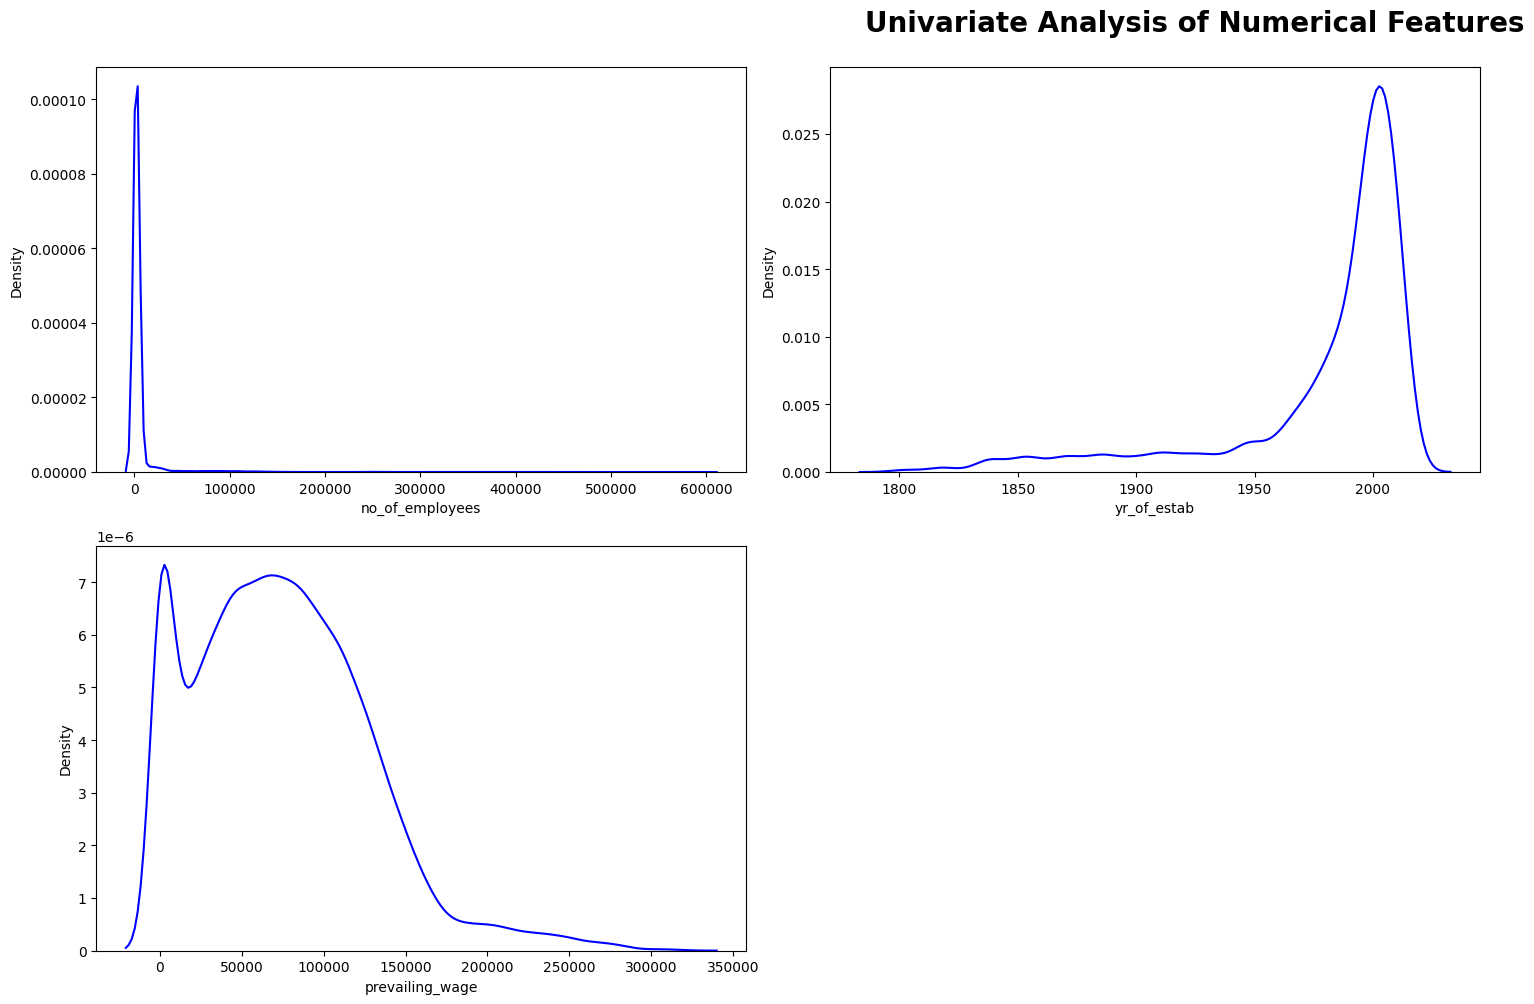

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',x=0.8,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]],color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

***Insights***

- `no_of_employees` is right skewed,need to check if there are any outliers

- `yr_of_establishment` is left skewed,somewhat makes sense,as many companies came into existence in last few decades

- `prevailing_wage` is right skewed,need to analyse

### Categorical Features

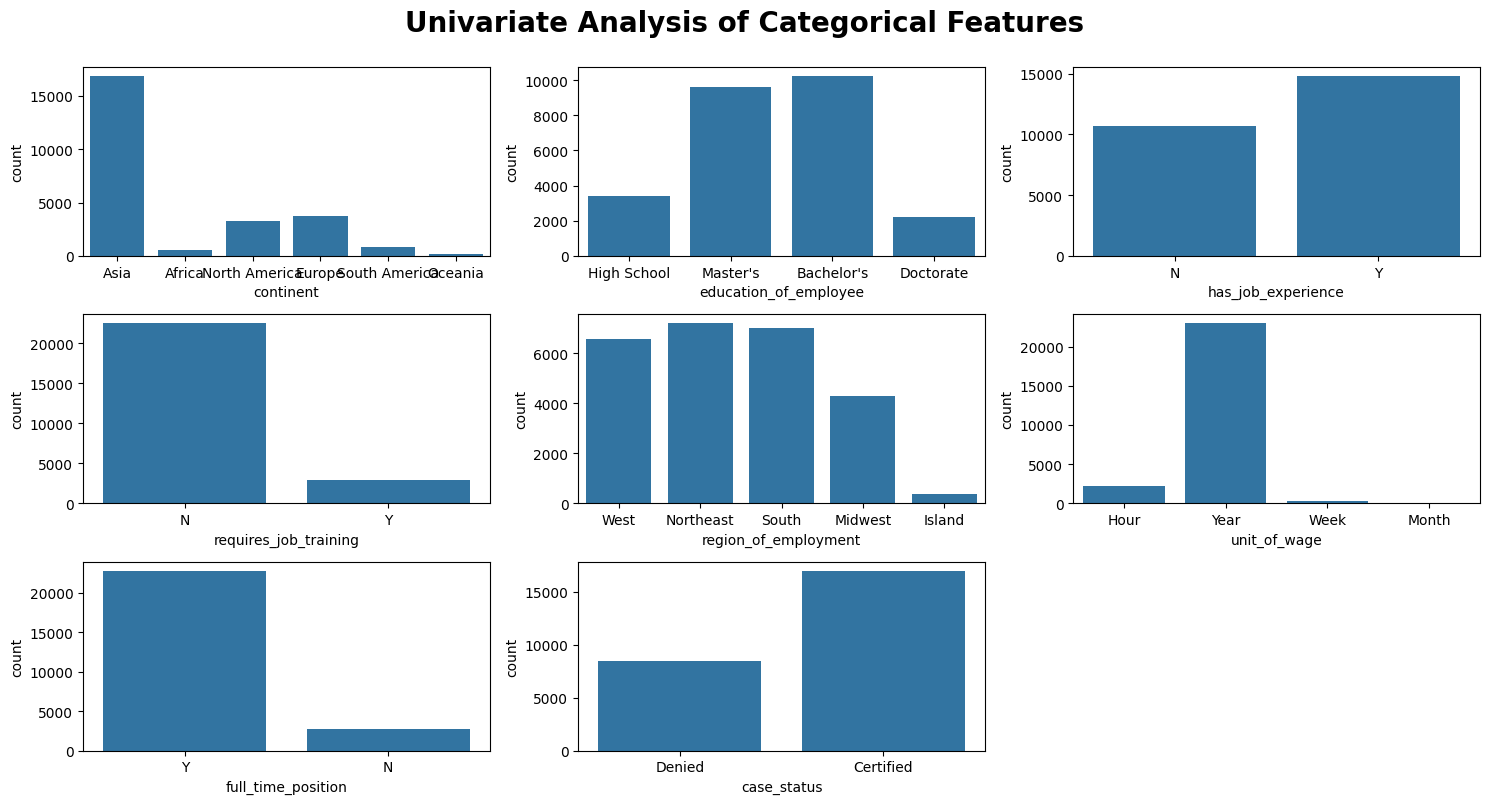

In [16]:
## categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20,fontweight='bold',x=0.5,y=1)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()


### Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable

In [17]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]

continuous_features = [feature for feature in numerical_features if len(df[feature].unique())>25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))



We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Check multicollinearity for numerical features

In [18]:
# Multicollinearity for numerical features
df[numerical_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


### Checking null values

In [19]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**From above, we can infer that there are no null values in the dataset**

## 4. Visualization

**4.1.Visualize the target feature**

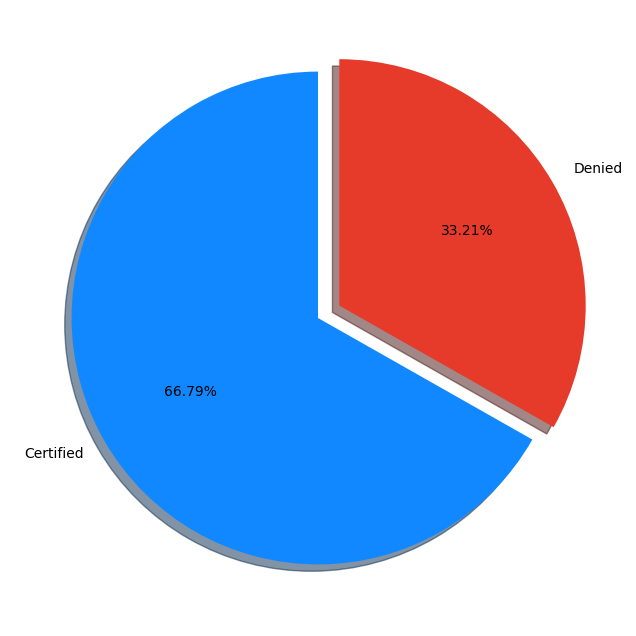

In [20]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ['Certified','Denied']

# Plot piechart with plotly library
fig,ax = plt.subplots(figsize=(15,8))
explode = (0,0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage,labels=labels,startangle=90,
       autopct='%1.2f%%',explode=explode,shadow=True,colors=colors)
plt.show()

**From the chart we see that,target class is imbalanced**


### 4.2. Does applicant continent has any impact Visa status??

In [21]:
### group data by continent and their count of case status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

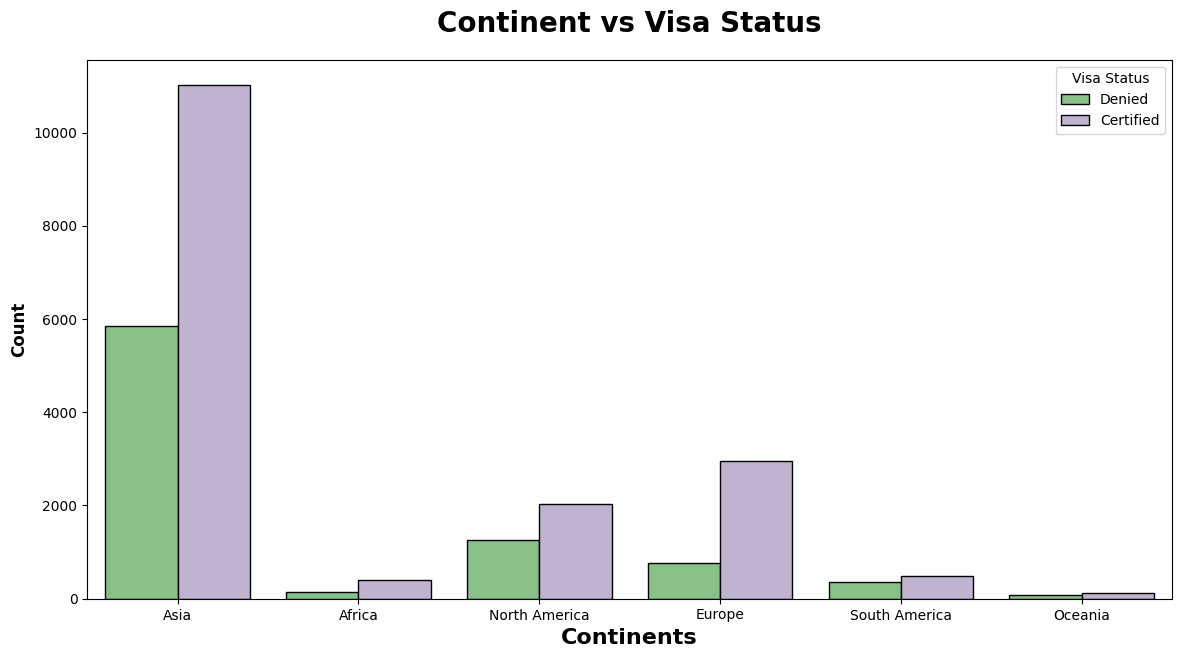

In [22]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status")
plt.show()

In [23]:
df2=df.copy()

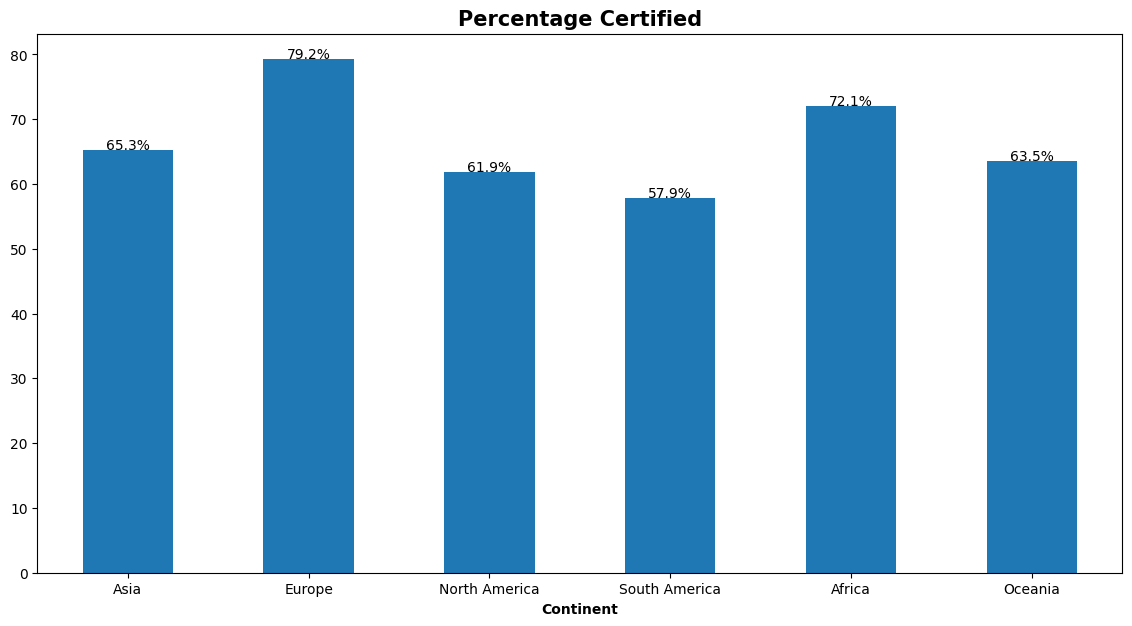

In [24]:
plt.figure(figsize=[14,7])

cont_wise_cert_pct=(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
cont_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title('Percentage Certified',fontsize=15,fontweight='bold')
for n in range(cont_wise_cert_pct.shape[0]):
    count = cont_wise_cert_pct[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent',fontweight='bold')
plt.xticks(rotation=0)
plt.show()


#### 4.3.Does Applicant education have any impact on the Visa Status?

In [25]:
# group by education and value count of case status
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

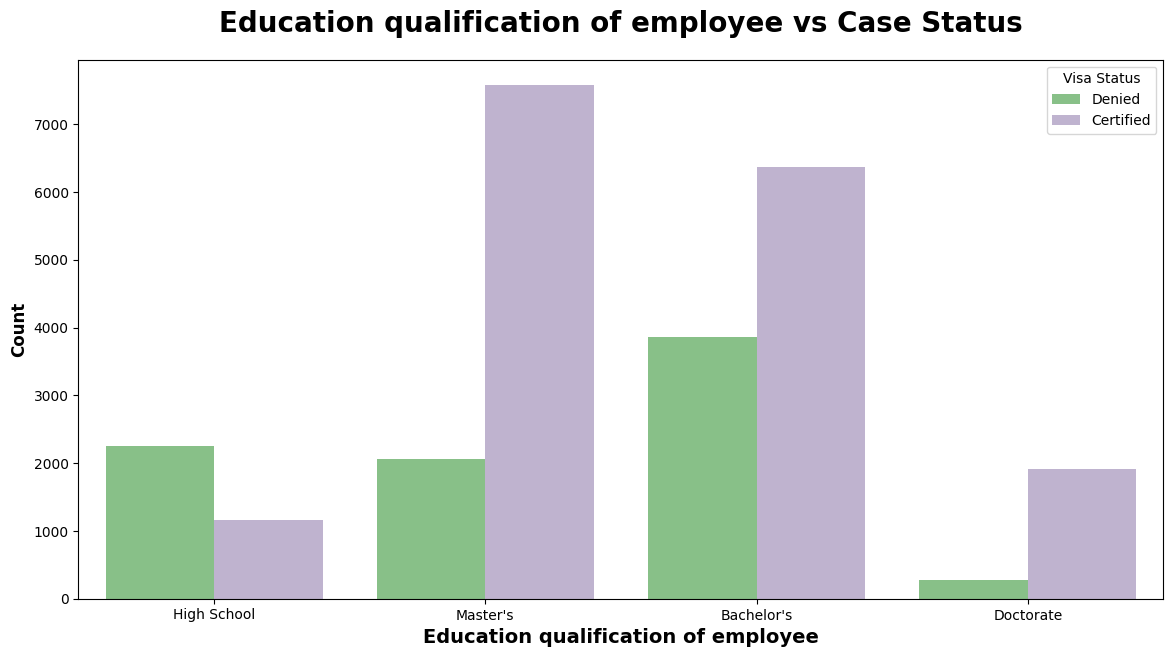

In [26]:
plt.figure(figsize=[14,7])
sns.countplot(x='education_of_employee',hue='case_status',data=df,palette='Accent')
plt.title('Education qualification of employee vs Case Status',weight='bold',fontsize=20,pad=20)
plt.xlabel('Education qualification of employee',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=12)
plt.legend(title = 'Visa Status')
plt.show()

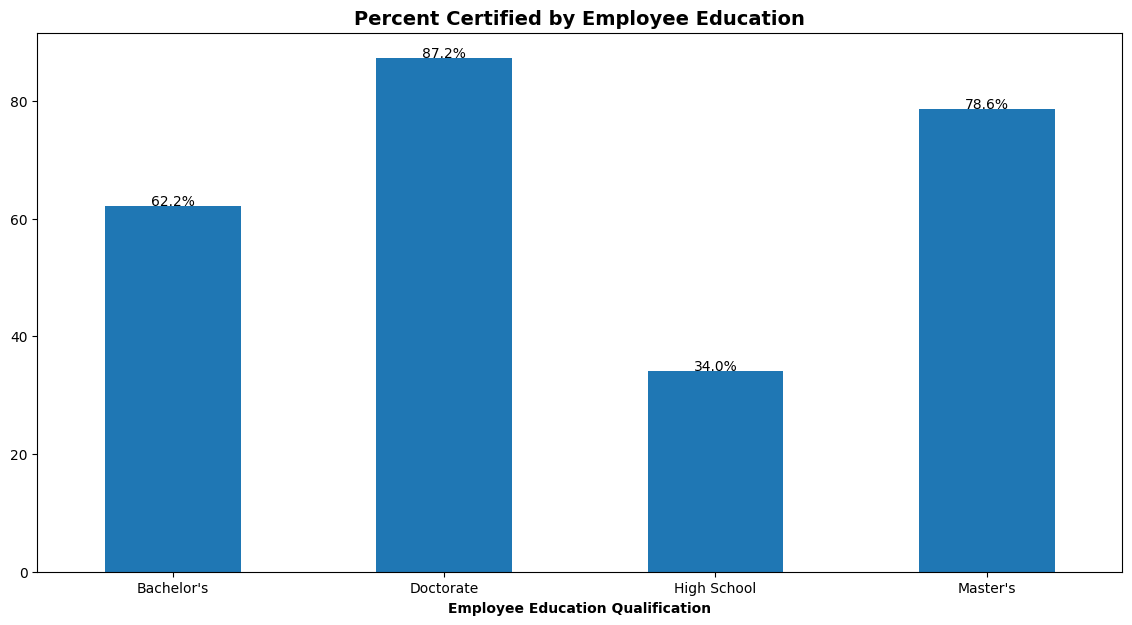

In [27]:
plt.figure(figsize=[14,7])

edu_qual_wise_cert_pct = 100*(df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
edu_qual_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title('Percent Certified by Employee Education',fontsize=14,fontweight='bold')
for n in range(edu_qual_wise_cert_pct.shape[0]):
    count = edu_qual_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Employee Education Qualification',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

#### 4.4.Does Applicant's previous work experience has any impact on Visa Status?

In [28]:
# groupby data based on has_work_experience and count case status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

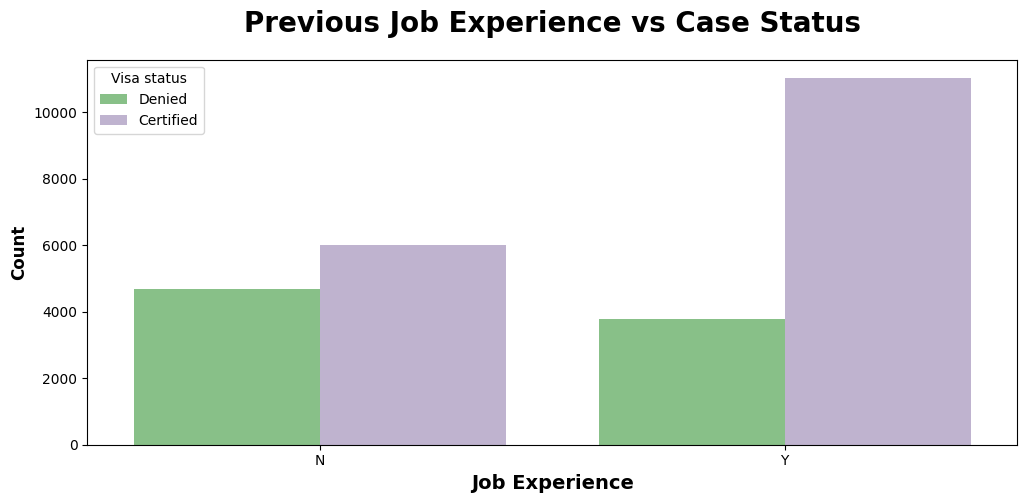

In [29]:
plt.figure(figsize=[12,5])
sns.countplot(x='has_job_experience',hue='case_status',data=df,palette='Accent')
plt.title('Previous Job Experience vs Case Status',weight='bold',fontsize=20,pad=20)
plt.xlabel('Job Experience',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=12)
plt.legend(title='Visa status')
plt.show()

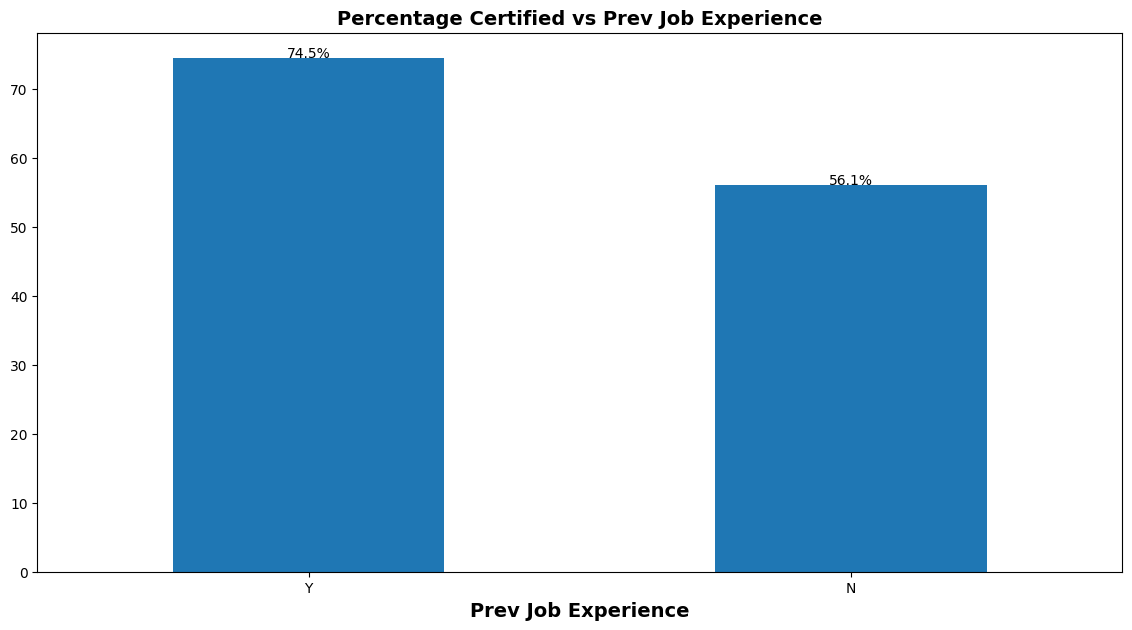

In [30]:
plt.figure(figsize=[14,7])

job_exp_wise_cert_pct=100*(df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
job_exp_wise_cert_pct.plot(kind='bar',stacked='True')
plt.title('Percentage Certified vs Prev Job Experience',fontsize=14,fontweight='bold')
for n in range(job_exp_wise_cert_pct.shape[0]):
    count = job_exp_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Prev Job Experience',fontweight='bold',fontsize=14)
plt.xticks(rotation=0)
plt.show()


In [31]:
# group by data based on requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

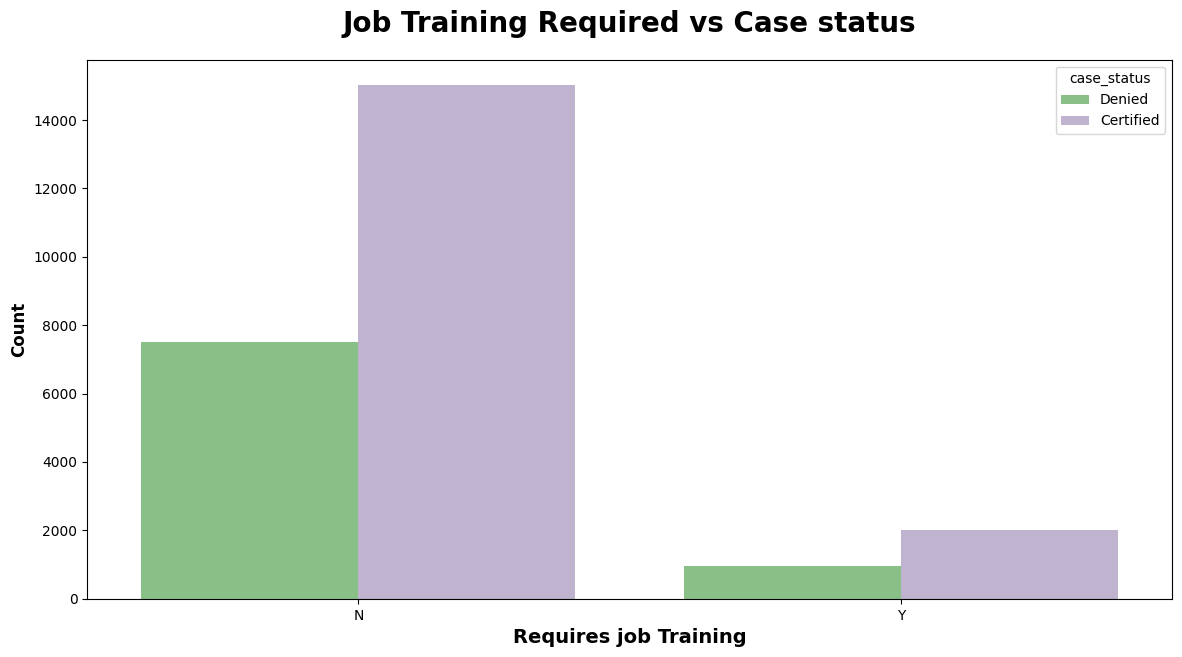

In [32]:
plt.figure(figsize=[14,7])
sns.countplot(x='requires_job_training',hue='case_status',data=df,palette='Accent')
plt.title('Job Training Required vs Case status',fontsize=20,weight='bold',pad=20)
plt.xlabel('Requires job Training',fontsize=14,weight='bold')
plt.ylabel('Count',weight='bold',fontsize=12)
plt.show()

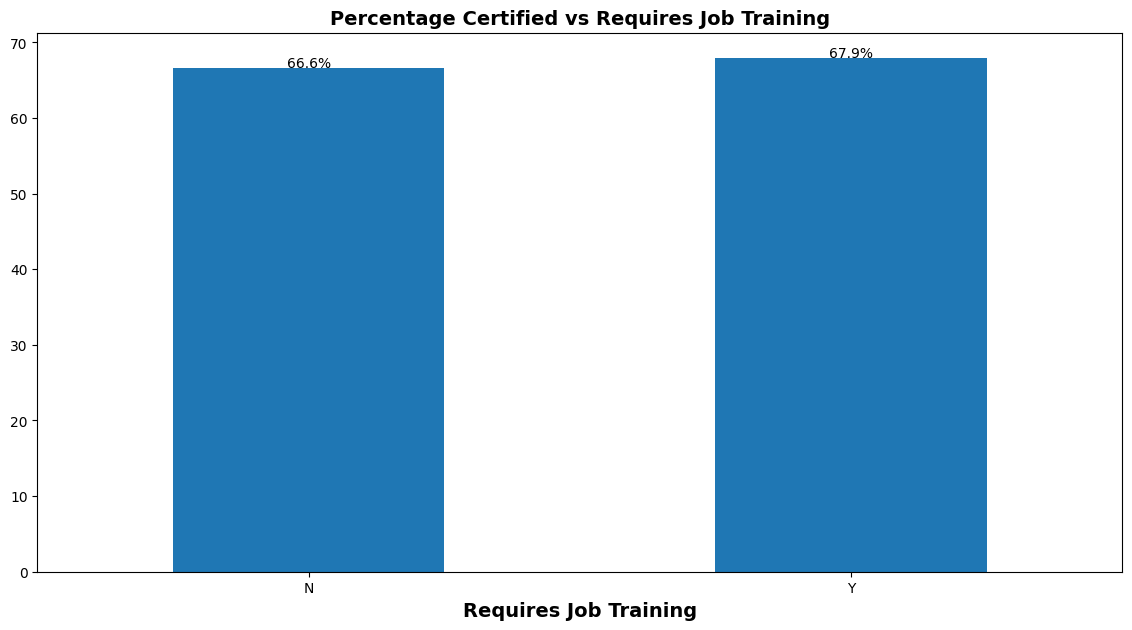

In [33]:
plt.figure(figsize=[14,7])

job_training_wise_cert_pct=100*(df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
job_training_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title('Percentage Certified vs Requires Job Training',fontsize=14,fontweight='bold')
for n in range(job_training_wise_cert_pct.shape[0]):
    count = job_training_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Requires Job Training',weight='bold',fontsize=14)
plt.xticks(rotation=0)
plt.show()

### 4.6 Does Number of employees of employer has any impact on Visa status?

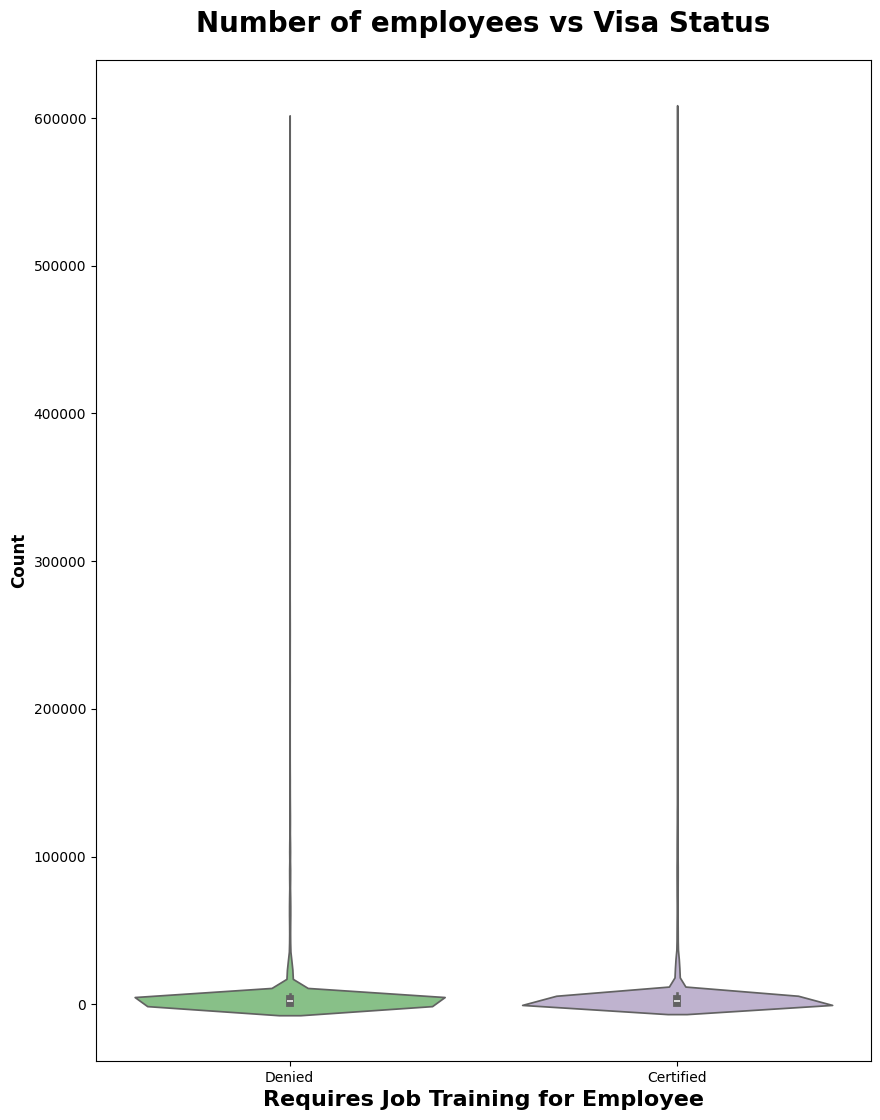

In [34]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

#### 4.7.Unit of Wages and its impact on Visa status

In [35]:
# group by 
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

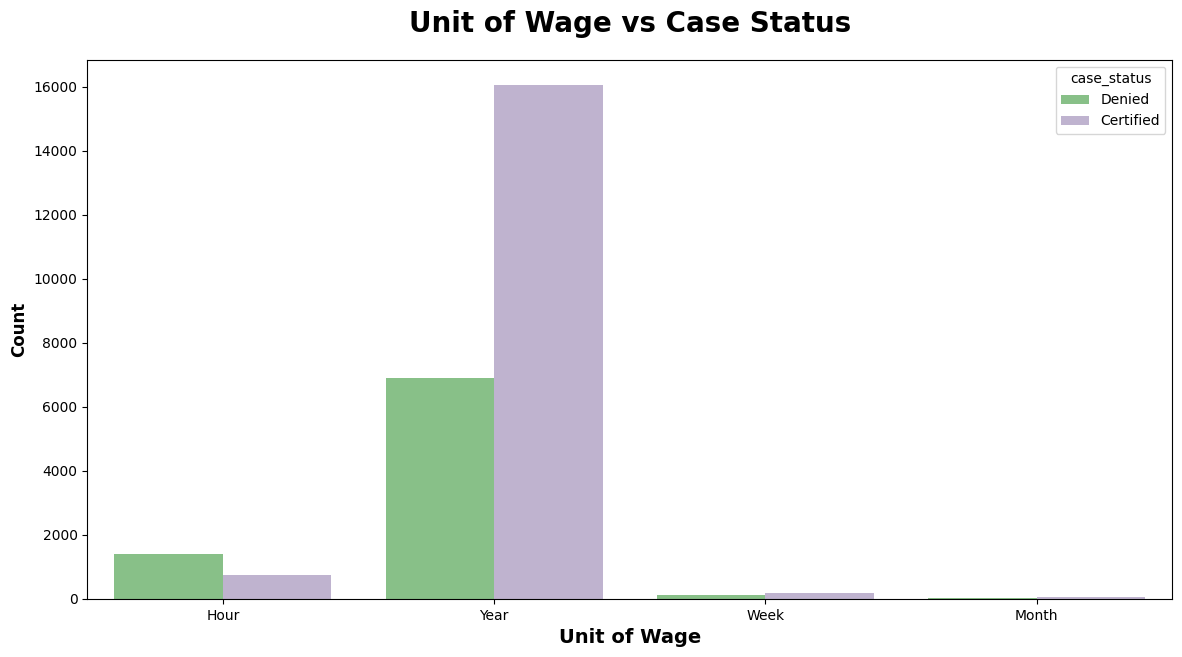

In [36]:
plt.figure(figsize=[14,7])
sns.countplot(x='unit_of_wage',hue='case_status',data=df,palette='Accent')
plt.title('Unit of Wage vs Case Status',fontweight='bold',fontsize=20,pad=20)
plt.xlabel('Unit of Wage',fontweight='bold',fontsize=14)
plt.ylabel('Count',fontweight='bold',fontsize=12)
plt.show()

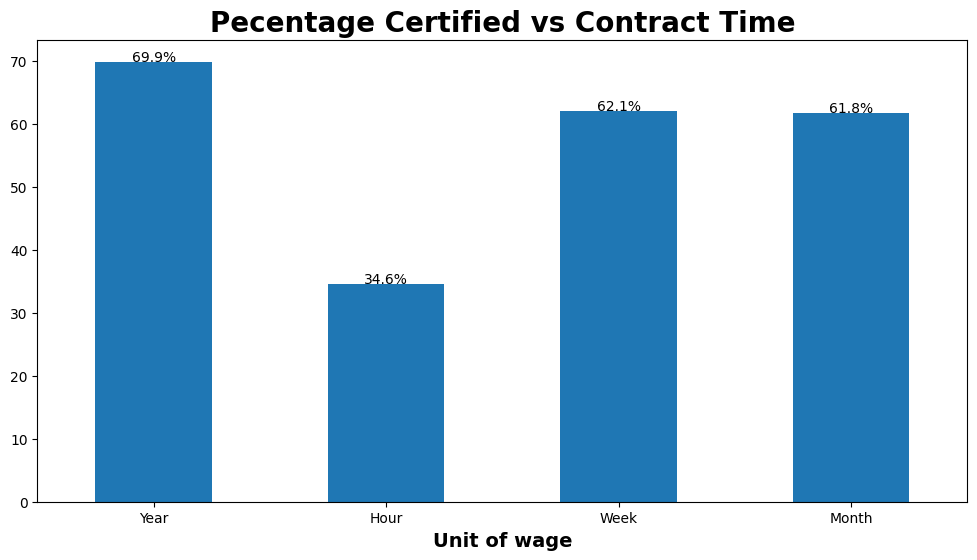

In [37]:
plt.figure(figsize=[12,6])

wage_unit_wise_cert_pct=100*(df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
wage_unit_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title("Pecentage Certified vs Contract Time",fontweight='bold',fontsize=20)
for n in range(wage_unit_wise_cert_pct.shape[0]):
    count = wage_unit_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Unit of wage',weight='bold',fontsize=14)
plt.xticks(rotation=0)
plt.show()

#### Does Region of employment has impact on Visa status ?

In [38]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

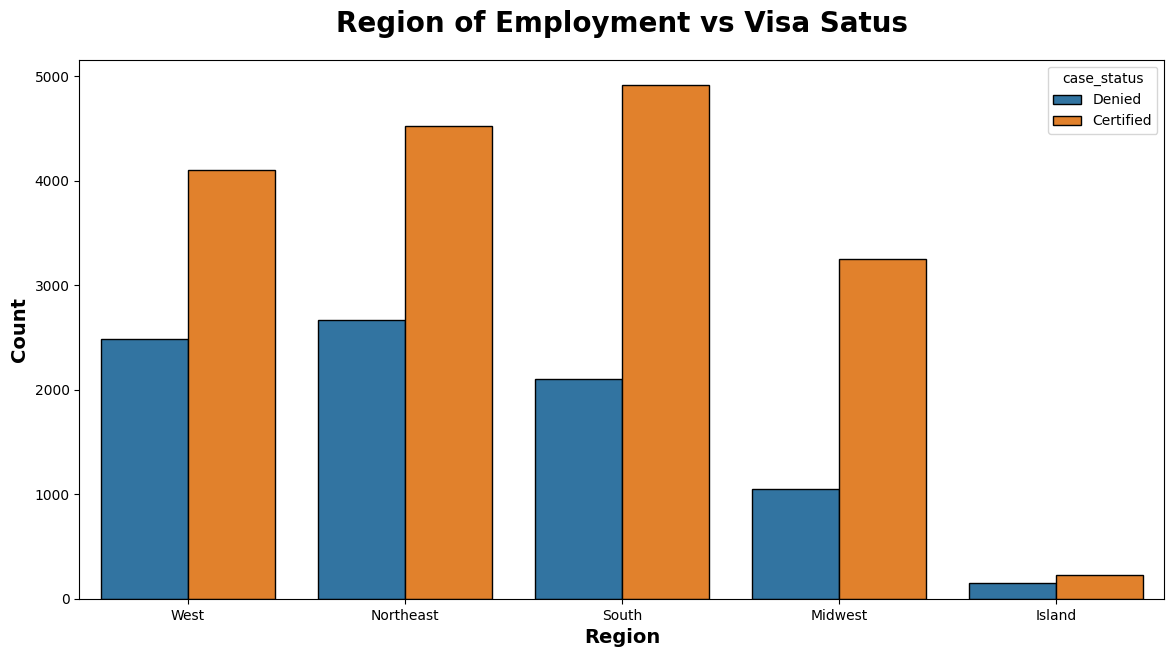

In [44]:
plt.figure(figsize=[14,7])
sns.countplot(x='region_of_employment',hue='case_status',data=df,ec='k')
plt.title('Region of Employment vs Visa Satus',weight='bold',fontsize=20,pad=20)
plt.xlabel('Region',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=14)
plt.show()


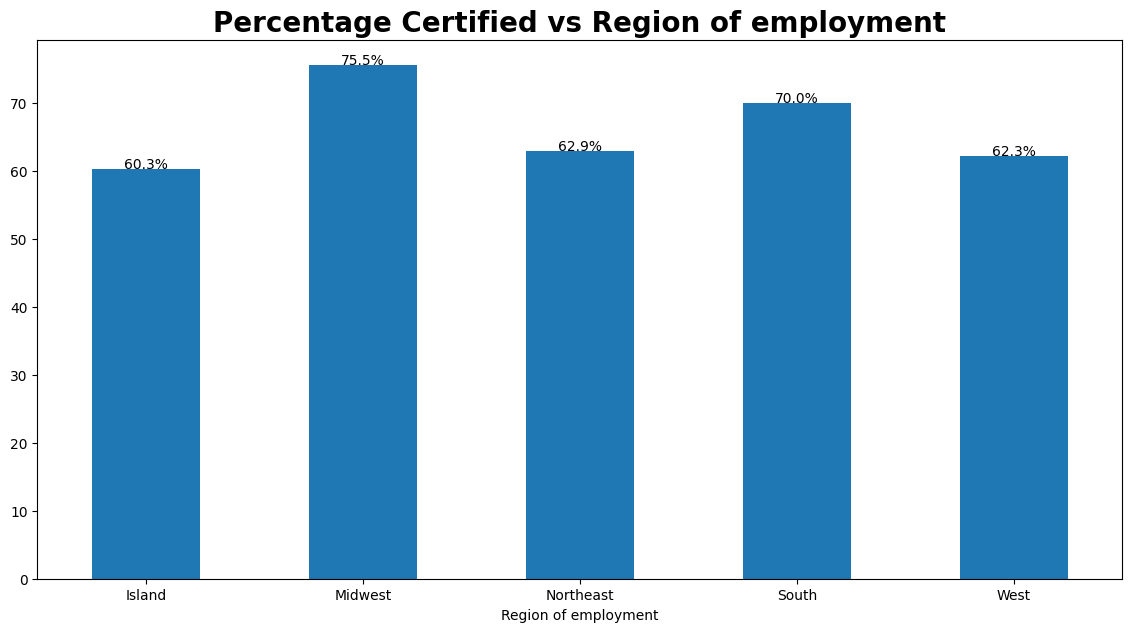

In [51]:
plt.figure(figsize=[14,7])

region_wise_cert_pct = 100*(df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
region_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title('Percentage Certified vs Region of employment',fontweight='bold',fontsize=20)
for n in range(region_wise_cert_pct.shape[0]):
    count = region_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Region of employment')
plt.xticks(rotation=0)
plt.show()

#### Full time position impact analysis

In [55]:
df.groupby('full_time_position')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
full_time_position case_status            
N                  Certified     68.526044
                   Denied        31.473956
Y                  Certified     66.583235
                   Denied        33.416765

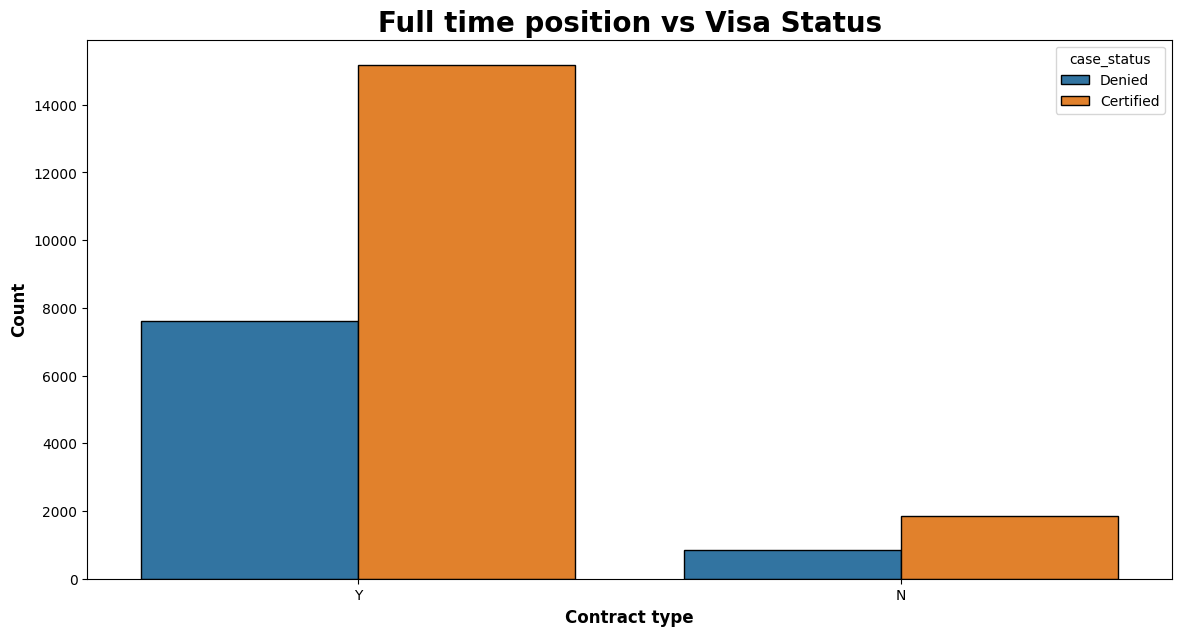

In [57]:
plt.figure(figsize=[14,7])
sns.countplot(x='full_time_position',hue='case_status',data=df,ec='k')
plt.title('Full time position vs Visa Status',weight='bold',fontsize=20)
plt.xlabel('Contract type',weight='bold',fontsize=12)
plt.ylabel('Count',weight='bold',fontsize=12)
plt.show()

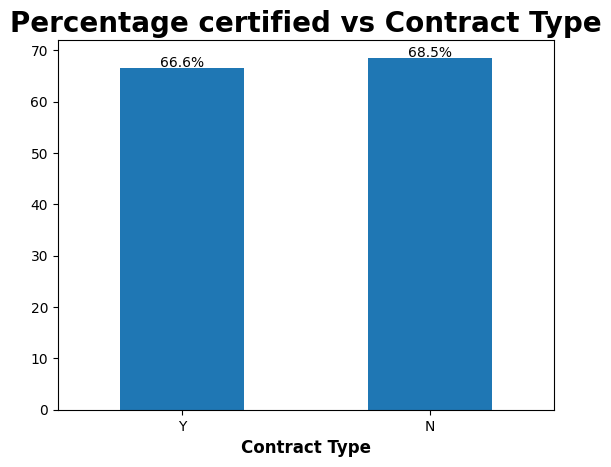

In [62]:
contract_type_wise_cert_pct=100*(df2[df2['case_status'].isin(['Certified'])]['full_time_position'].value_counts()/df2['full_time_position'].value_counts())
contract_type_wise_cert_pct.plot(kind='bar',stacked=True)
plt.title("Percentage certified vs Contract Type",fontweight='bold',fontsize=20)
for n in range(contract_type_wise_cert_pct.shape[0]):
    count = contract_type_wise_cert_pct[n]
    strt = '{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Contract Type',weight='bold',fontsize=12)
plt.xticks(rotation=0)
plt.show()

#### Prevailing wage vs Case Status

In [63]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [64]:
df.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

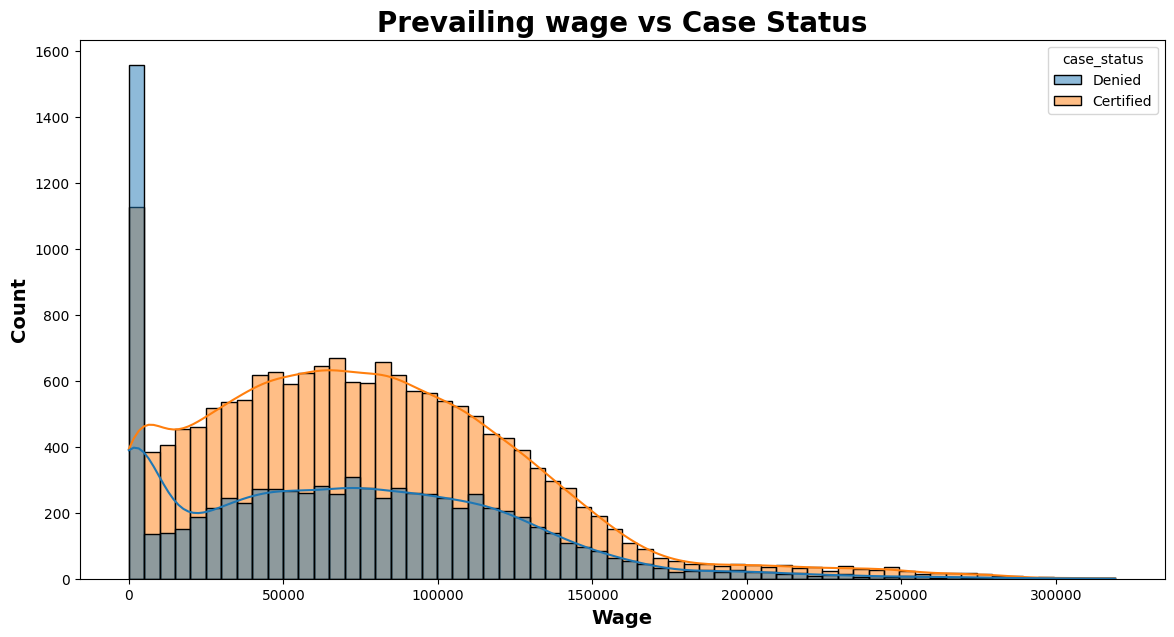

In [66]:
plt.figure(figsize=[14,7])
sns.histplot(x='prevailing_wage',hue='case_status',data=df,kde=True)
plt.title('Prevailing wage vs Case Status',fontweight='bold',fontsize=20)
plt.xlabel('Wage',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=14)
plt.show()

#### Prevailing wage vs Education

In [69]:
print('Average wage by education level')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average wage by education level


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


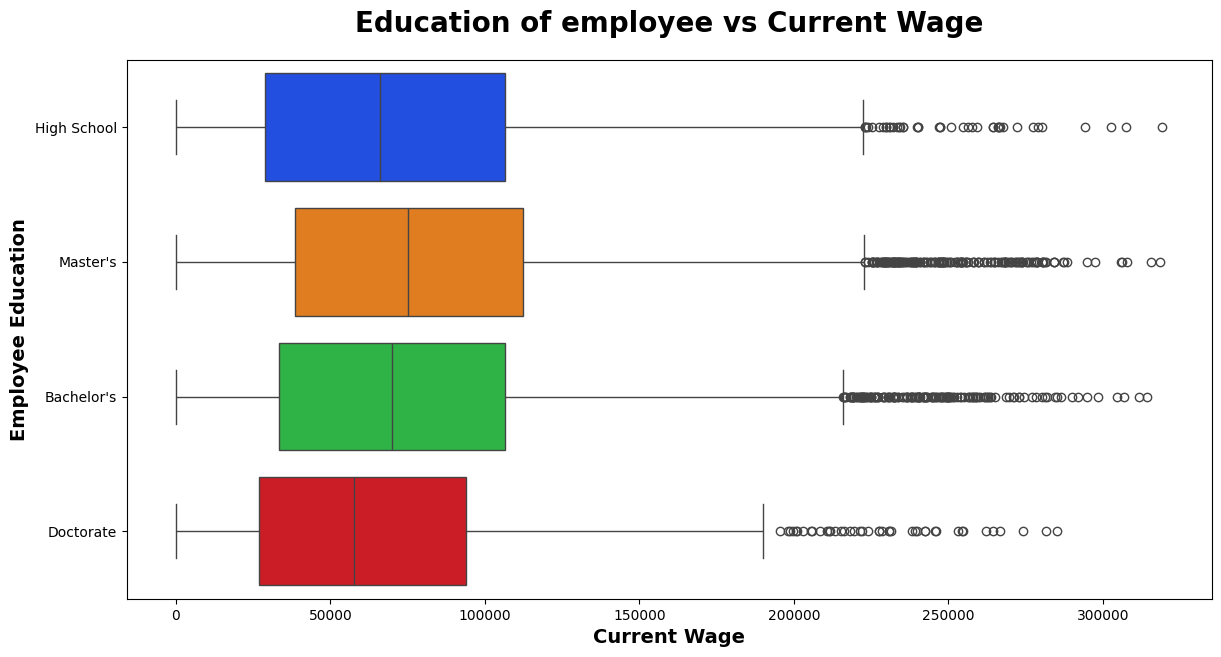

In [70]:
plt.figure(figsize=[14,7])
sns.boxplot(x='prevailing_wage',y='education_of_employee',data=df,palette='bright')
plt.title('Education of employee vs Current Wage',fontweight='bold',fontsize=20,pad=20)
plt.xlabel('Current Wage',weight='bold',fontsize=14)
plt.ylabel('Employee Education',weight='bold',fontsize=14)
plt.show()

#### Wage based on job experience

In [71]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [73]:
print('Median wage based on job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame()

Median wage based on job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


In [76]:
df.groupby('has_job_experience')['prevailing_wage'].max().to_frame()

,prevailing_wage
has_job_experience,
N,319210.27
Y,315497.60


#### Prevailing wage based on continent

In [78]:
print('Average prevailing wage based on continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average prevailing wage based on continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


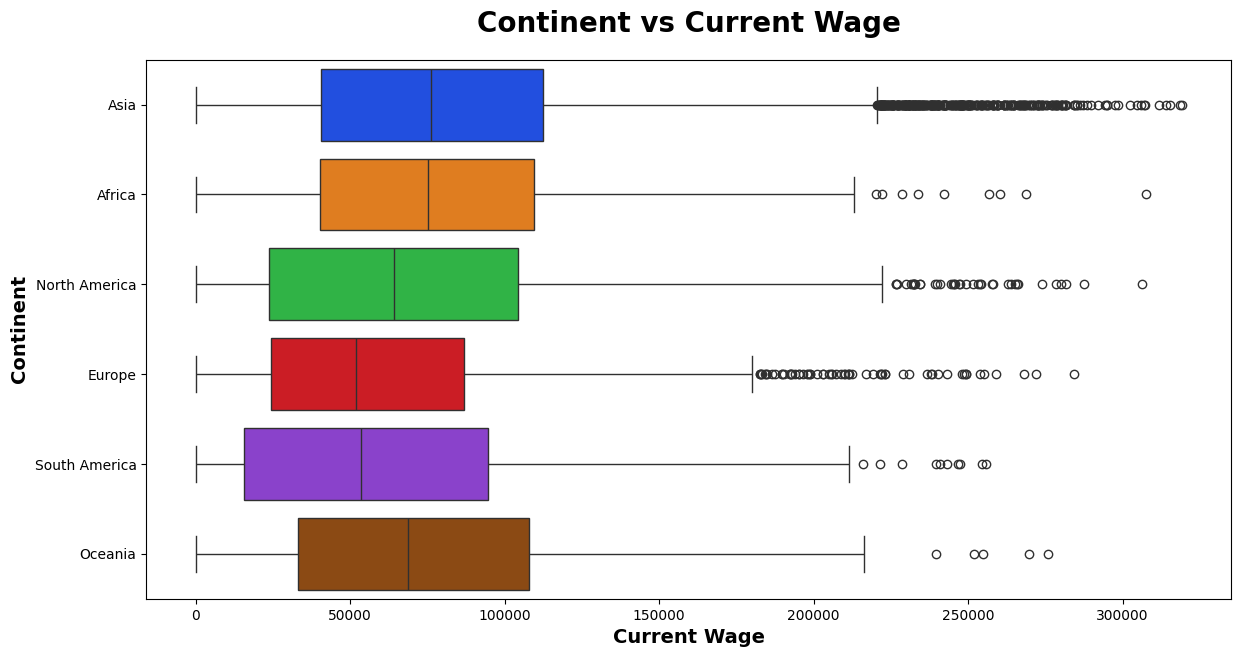

In [79]:
plt.figure(figsize=[14,7])
sns.boxplot(x='prevailing_wage',y='continent',data=df,palette='bright')
plt.title('Continent vs Current Wage',fontweight='bold',fontsize=20,pad=20)
plt.xlabel('Current Wage',weight='bold',fontsize=14)
plt.ylabel('Continent',weight='bold',fontsize=14)
plt.show()

#### Year of Establishment vs Visa Status

In [84]:
df.groupby('case_status')['yr_of_estab'].value_counts().to_frame().sort_values(by='count',ascending=False)

count
case_status yr_of_estab       
Certified   1998           736
            2005           719
            2007           682
            2001           656
            2006           610
...                        ...
Denied      1807             2
            1821             2
            1820             1
            1822             1
            1842             1

[395 rows x 1 columns]

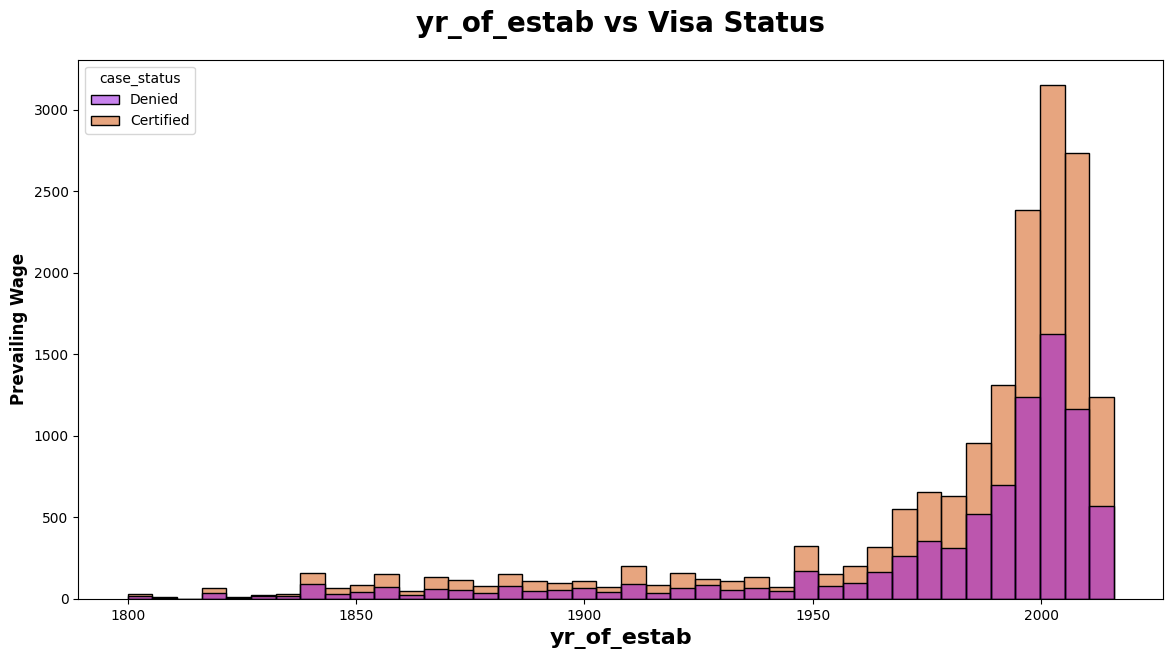

In [86]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()